In [2]:
#IMPORTAMOS LIBRERIAS Y MODULOS A UTILIZAR

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.cluster import KMeans, DBSCAN
import prince
from efficient_apriori import apriori

In [3]:
#CARGUE DE LOS DATOS
dfmarketing=pd.read_csv("data.csv",delimiter=";")
dfmarketing

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
118146,546670,47580,TEA TIME DES TEA COSY,2,3/15/2011 15:37,2.55,13451.0,United Kingdom
118147,546670,47559B,TEA TIME OVEN GLOVE,3,3/15/2011 15:37,1.25,13451.0,United Kingdom
118148,546670,21154,RED RETROSPOT OVEN GLOVE,3,3/15/2011 15:37,1.25,13451.0,United Kingdom
118149,546670,21231,SWEETHEART CERAMIC TRINKET BOX,8,3/15/2011 15:37,1.25,13451.0,United Kingdom


In [4]:
#BORRADO DE REGISTROS NULOS PARA REDUCIR EL DATASET
dfmarketing.dropna(inplace=True)
dfmarketing

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
118146,546670,47580,TEA TIME DES TEA COSY,2,3/15/2011 15:37,2.55,13451.0,United Kingdom
118147,546670,47559B,TEA TIME OVEN GLOVE,3,3/15/2011 15:37,1.25,13451.0,United Kingdom
118148,546670,21154,RED RETROSPOT OVEN GLOVE,3,3/15/2011 15:37,1.25,13451.0,United Kingdom
118149,546670,21231,SWEETHEART CERAMIC TRINKET BOX,8,3/15/2011 15:37,1.25,13451.0,United Kingdom


In [5]:
#CREAMOS UN SUBCONJUNTO AGRUPANDO LOS DATOS DE CANTIDAD (SUMA) Y PRECIO UNITARIO (PROMEDIO)
#PARA CADA PAÍS

grupo_paises=dfmarketing.groupby("Country").agg({
     "Quantity":"sum",
     "UnitPrice":"mean"
 }).reset_index()
print(grupo_paises)

          Country  Quantity  UnitPrice
0       Australia     25009   3.006052
1            EIRE     24891   9.681216
2          France     21127   3.399362
3         Germany     22031   3.634221
4     Netherlands     44017   2.202884
5           Spain      5962   8.727765
6          Sweden     12216   2.924369
7     Switzerland      5126   3.578797
8  United Kingdom    771234   3.187862


In [6]:
#NORMALIZACION Y ESCALADO DE LOS DATOS AGRUPADOS

normaliz=grupo_paises[["Quantity","UnitPrice"]]

scaler=StandardScaler()
dfescalado=scaler.fit_transform(normaliz)

dfescalado

array([[-0.33216888, -0.57548943],
       [-0.33266817,  2.02634819],
       [-0.34859463, -0.42218539],
       [-0.34476957, -0.33064237],
       [-0.25174111, -0.88854716],
       [-0.41276167,  1.65471299],
       [-0.38629938, -0.60732771],
       [-0.416299  , -0.35224532],
       [ 2.82530239, -0.50462379]])

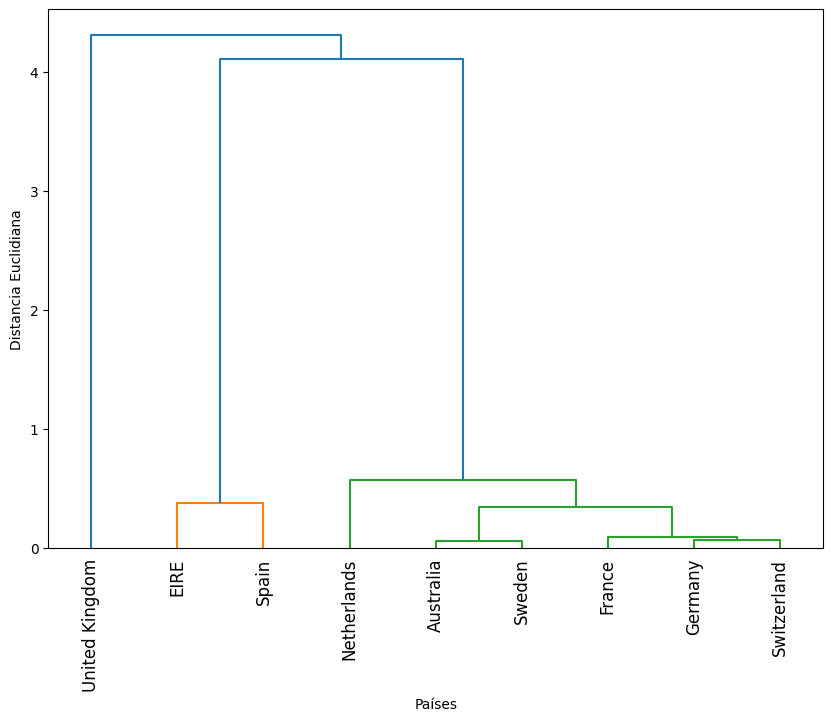

In [7]:
#CALCULO DE LAS DISTANCIAS ENTRE LOS PUNTOS DE DATOS

z=linkage(dfescalado,method="ward") #Creación de enlaces por mínima varianza, para crear clústeres equilibrados
#y de tamaño similar. Con este cálculo se crea el Dendograma

#DENDOGRAMA PARA AGRUPACIÓN JERARQUICA POR PAÍS

plt.figure(figsize=(10,7))
dendrogram(z,labels=grupo_paises["Country"].values) 
plt.xlabel("Países")
plt.ylabel("Distancia Euclidiana")
plt.xticks(rotation=90)
plt.show()

In [8]:
#DETERMINACION DEL NÚMERO DE CLUSTERES BAJO LA FUNCION FCLUSTER
max_d=4
clusters=fcluster(z,max_d,criterion="maxclust")

grupo_paises["Cluster"]=clusters

print(grupo_paises.sort_values(by="Cluster"))

          Country  Quantity  UnitPrice  Cluster
1            EIRE     24891   9.681216        1
5           Spain      5962   8.727765        1
0       Australia     25009   3.006052        2
2          France     21127   3.399362        2
3         Germany     22031   3.634221        2
6          Sweden     12216   2.924369        2
7     Switzerland      5126   3.578797        2
4     Netherlands     44017   2.202884        3
8  United Kingdom    771234   3.187862        4


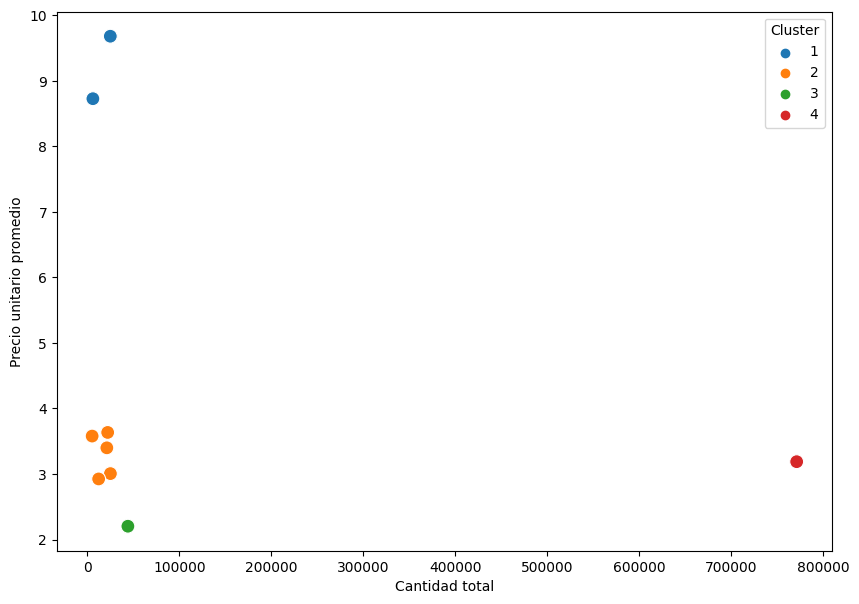

In [9]:
#VISUALIZACION DE RESULTADOS

plt.figure(figsize=(10,7))
sns.scatterplot(data=grupo_paises,x="Quantity",y="UnitPrice",hue="Cluster",palette="tab10",s=100)
plt.xlabel("Cantidad total")
plt.ylabel("Precio unitario promedio")
plt.show()